# 상관관계 확인하기
- multicul_acc, support
- 다문화가정 어머니의 문화적응 -> 다문화 청소년 자녀의 다문화 수용성
  - 조절 효과로 정책 개입

In [1]:
import pandas as pd
import seaborn as sns   
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/kju1.csv')

In [3]:
# 빈칸을 0으로 바꿈
#    ' ' 이런 null 값 => 0으로 치환
data = data.replace(' ',0)
data = data.replace('  ',0)

In [4]:
# correlation 
corr = data.corr()
corr_kendall = data.corr(method='kendall')
corr_pearson = data.corr(method='pearson')
corr_spearman = data.corr(method='spearman')

,ID,PID,SURVEY1_w7
ID,1.000000,0.999714,-0.096541
PID,0.999714,1.000000,-0.095775
SURVEY1_w7,-0.096541,-0.095775,1.000000


In [12]:
# null 값이 있는 부분을 출력
data_na = data[data.isnull()].isna().sum()

for na in data_na:
    if na!=1635:
        print(na)

## TODO
correlation matrix를 확인해보면, 371열이 있는데 3개의 열에 대해서만 값이 나옴...  
- raw data에서 값이 없는 부분들은 공백문자열이 들어가있음(그래서 isnull, isna 로 찾을 수 없음)
  - replace 함수로 0으로 치환해줌
    - data = data.replace('  ',0)  

- 

In [21]:
new_data = pd.DataFrame()

for c in data.columns:
    try:
        new_data[c] = data[c].astype(float)
    except:
        print(f'{c} can not be converted to float')
        new_data[c] = data[c]

job_plan_a01_1_w7 can not be converted to float
job_plan_a01_2_w7 can not be converted to float


In [24]:
print(f'new data\t{new_data.columns}\nold data\t{data.columns}')

new data	Index(['ID', 'PID', 'WAVE_w7', 'SURVEY1_w7', 'SURVEY2_w7', 'S_GENDER_w7',
       'S_AGE_w7', 'S_AREA1_w7', 'S_AREA2_w7', 'SCHOOL_w7',
       ...
       'learn_amp_a03_w7', 'learn_amp_a05_w7', 'learn_amp_a06_w7',
       'learn_amp_a07_w7', 'learn_amp_ca01_w7', 'learn_amp_ca02_w7',
       'learn_amp_ca03_w7', 'learn_amp_ca05_w7', 'learn_amp_ca06_w7',
       'learn_amp_ca07_w7'],
      dtype='object', length=371)
old data	Index(['ID', 'PID', 'WAVE_w7', 'SURVEY1_w7', 'SURVEY2_w7', 'S_GENDER_w7',
       'S_AGE_w7', 'S_AREA1_w7', 'S_AREA2_w7', 'SCHOOL_w7',
       ...
       'learn_amp_a03_w7', 'learn_amp_a05_w7', 'learn_amp_a06_w7',
       'learn_amp_a07_w7', 'learn_amp_ca01_w7', 'learn_amp_ca02_w7',
       'learn_amp_ca03_w7', 'learn_amp_ca05_w7', 'learn_amp_ca06_w7',
       'learn_amp_ca07_w7'],
      dtype='object', length=371)


In [25]:
new_data.head()

,ID,PID,WAVE_w7,SURVEY1_w7,SURVEY2_w7,S_GENDER_w7,S_AGE_w7,S_AREA1_w7,S_AREA2_w7,SCHOOL_w7,...,learn_amp_a03_w7,learn_amp_a05_w7,learn_amp_a06_w7,learn_amp_a07_w7,learn_amp_ca01_w7,learn_amp_ca02_w7,learn_amp_ca03_w7,learn_amp_ca05_w7,learn_amp_ca06_w7,learn_amp_ca07_w7
0,1.0,100003.0,7.0,1.0,0.0,2.0,16.0,2.0,2.0,2.0,...,2.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0
1,2.0,100008.0,7.0,1.0,0.0,2.0,16.0,2.0,1.0,2.0,...,1.0,1.0,1.0,2.0,0.0,0.0,1.0,2.0,4.0,0.0
2,3.0,100012.0,7.0,1.0,0.0,1.0,16.0,2.0,2.0,2.0,...,1.0,2.0,1.0,2.0,0.0,0.0,5.0,0.0,2.0,0.0
3,4.0,100016.0,7.0,1.0,0.0,1.0,15.0,2.0,2.0,2.0,...,1.0,2.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0
4,5.0,100022.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# correlation 상수 별로 구하기
corr_kendall = new_data.corr(method='kendall')
corr_pearson = new_data.corr(method='pearson')
corr_spearman = new_data.corr(method='spearman')

In [31]:
# 저장
result_name_csv = 'result_kju.csv'
resname_xlsx = 'result_kju.xlsx'

with pd.ExcelWriter(resname_xlsx) as writer:
    corr_kendall.to_excel(writer, sheet_name='kendall')
    corr_pearson.to_excel(writer, sheet_name='pearson')
    corr_spearman.to_excel(writer, sheet_name='spearman')
# new_data.to_csv('result_kju.csv')

# 일단은 완료
- 세개의 상관계수로 상관관계 확인하고 하나의 파일로 출력해주는 것까지 완료

In [ ]:
sns.heatmap(data = corr_kendall, annot=True,fmt = '.2f', linewidths=.5, cmap='Blues')

<AxesSubplot:>

In [13]:
na_data = data[data.isna()].count()


for n in na_data:
    print(n)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [28]:
data[data['SURVEY1_w7'].isnull()]

,ID,PID,WAVE_w7,SURVEY1_w7,SURVEY2_w7,S_GENDER_w7,S_AGE_w7,S_AREA1_w7,S_AREA2_w7,SCHOOL_w7,...,learn_amp_a03_w7,learn_amp_a05_w7,learn_amp_a06_w7,learn_amp_a07_w7,learn_amp_ca01_w7,learn_amp_ca02_w7,learn_amp_ca03_w7,learn_amp_ca05_w7,learn_amp_ca06_w7,learn_amp_ca07_w7


In [32]:
data.iloc[5]['WAVE_w7']

' '

In [20]:
data.head(15)

,ID,PID,WAVE_w7,SURVEY1_w7,SURVEY2_w7,S_GENDER_w7,S_AGE_w7,S_AREA1_w7,S_AREA2_w7,SCHOOL_w7,...,learn_amp_a03_w7,learn_amp_a05_w7,learn_amp_a06_w7,learn_amp_a07_w7,learn_amp_ca01_w7,learn_amp_ca02_w7,learn_amp_ca03_w7,learn_amp_ca05_w7,learn_amp_ca06_w7,learn_amp_ca07_w7
0,1,100003,7,1,,2,16,2,2,2,...,2,2,1,2,,,,,2,
1,2,100008,7,1,,2,16,2,1,2,...,1,1,1,2,,,1,2,4,
2,3,100012,7,1,,1,16,2,2,2,...,1,2,1,2,,,5,,2,
3,4,100016,7,1,,1,15,2,2,2,...,1,2,2,2,,,2,,,
4,5,100022,,2,,,,,,,...,,,,,,,,,,
5,6,100025,,2,,,,,,,...,,,,,,,,,,
6,7,100028,7,1,,1,16,2,2,2,...,2,2,2,2,3,,,,,
7,8,100031,,2,,,,,,,...,,,,,,,,,,
8,9,100034,7,1,,2,16,2,2,2,...,2,2,2,2,,,,,,
9,10,100039,7,1,,1,15,2,2,2,...,2,2,2,2,,,,,,


In [36]:
data.tail()

,ID,PID,WAVE_w7,SURVEY1_w7,SURVEY2_w7,S_GENDER_w7,S_AGE_w7,S_AREA1_w7,S_AREA2_w7,SCHOOL_w7,...,learn_amp_a03_w7,learn_amp_a05_w7,learn_amp_a06_w7,learn_amp_a07_w7,learn_amp_ca01_w7,learn_amp_ca02_w7,learn_amp_ca03_w7,learn_amp_ca05_w7,learn_amp_ca06_w7,learn_amp_ca07_w7
1630,1630,107538,7,1,0,1,16,3,2,2,...,2,1,2,2,0,0,0,2,0,0
1631,1631,107542,7,1,0,2,16,3,2,2,...,2,1,2,2,0,0,0,2,0,0
1632,1632,107547,7,1,0,1,16,3,3,2,...,2,1,2,2,0,0,0,2,0,0
1633,1633,107554,7,1,0,2,16,3,3,2,...,2,1,2,2,0,0,0,2,0,0
1634,1634,107560,7,1,0,1,16,3,3,2,...,2,2,2,2,0,0,0,0,0,0


In [42]:
data.corr(method='kendall')

,ID,PID,SURVEY1_w7
ID,1.000000,0.999996,-0.078887
PID,0.999996,1.000000,-0.078887
SURVEY1_w7,-0.078887,-0.078887,1.000000


In [41]:
data.corr(method='pearson')

,ID,PID,SURVEY1_w7
ID,1.000000,0.999714,-0.096541
PID,0.999714,1.000000,-0.095775
SURVEY1_w7,-0.096541,-0.095775,1.000000


<AxesSubplot:>

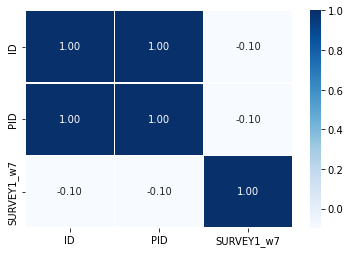

In [38]:
sns.heatmap(data = data.corr(), annot=True,fmt = '.2f', linewidths=.5, cmap='Blues')

##